In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Ice_cream selling data.csv")

In [139]:
data

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [140]:
data.rename(columns={"Temperature (°C)":"temperature","Ice Cream Sales (units)":"sales"},inplace =True)

In [141]:
data


,temperature,sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


Text(0, 0.5, 'sales')

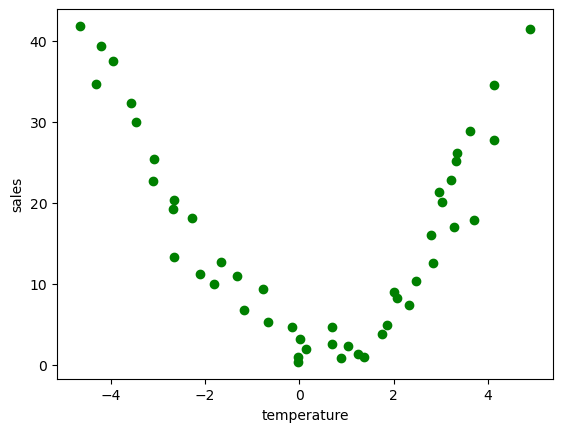

In [142]:
x=data[["temperature"]]
y=data["sales"]
plt.scatter(x,y,color='g')
plt.xlabel("temperature")
plt.ylabel("sales")

In [143]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [144]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [145]:
ypred=model.predict(xtest)

In [146]:
from sklearn.metrics import r2_score
score=r2_score(ytest,ypred)

In [147]:
score

-0.0734596067983353

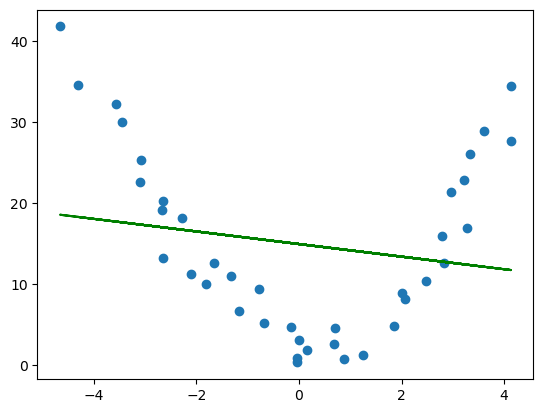

In [148]:
plt.plot(xtrain,model.predict(xtrain),color='g')
plt.scatter(xtrain,ytrain)

In [149]:
#polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
model=PolynomialFeatures(degree=2,include_bias=True)
xtrain_poly=model.fit_transform(xtrain)
xtest_poly=model.transform(xtest)

In [150]:
xtrain_poly
#[1,x1,x1^2]

array([[ 1.00000000e+00,  1.85055193e+00,  3.42454243e+00],
       [ 1.00000000e+00,  2.95993209e+00,  8.76119799e+00],
       [ 1.00000000e+00, -3.38952856e-02,  1.14889038e-03],
       [ 1.00000000e+00,  2.47194600e+00,  6.11051701e+00],
       [ 1.00000000e+00, -1.49634867e-01,  2.23905933e-02],
       [ 1.00000000e+00,  3.27004407e+00,  1.06931882e+01],
       [ 1.00000000e+00,  2.78483646e+00,  7.75531413e+00],
       [ 1.00000000e+00,  8.74905029e-01,  7.65458810e-01],
       [ 1.00000000e+00,  8.60769873e-03,  7.40924775e-05],
       [ 1.00000000e+00, -1.81893761e+00,  3.30853403e+00],
       [ 1.00000000e+00,  3.21136614e+00,  1.03128725e+01],
       [ 1.00000000e+00, -7.73330043e-01,  5.98039356e-01],
       [ 1.00000000e+00,  3.61077848e+00,  1.30377212e+01],
       [ 1.00000000e+00,  6.88780908e-01,  4.74419139e-01],
       [ 1.00000000e+00,  1.49244574e-01,  2.22739429e-02],
       [ 1.00000000e+00, -3.57855372e+00,  1.28060467e+01],
       [ 1.00000000e+00,  1.99931037e+00

In [151]:
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(xtrain_poly,ytrain)
ypred=model.predict(xtest_poly)
score=r2_score(ytest,ypred)

In [152]:
score

0.9289439966514089

In [153]:
model.coef_

array([ 0.        , -0.65725822,  1.80939278])

In [154]:
model.intercept_

3.340793070777586

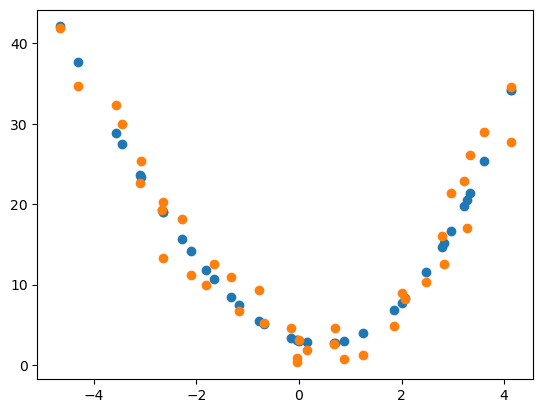

In [159]:
plt.scatter(xtrain,model.predict(xtrain_poly))
plt.scatter(xtrain,ytrain)